# Alpaca Demo

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [18]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [28]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-11", tz="America/New_York").isoformat()

In [29]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [30]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [31]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-03-11 05:00:00+00:00,268.11,277.90,267.82,273.88,21833979,258846,274.276311,FB
2021-03-11 05:00:00+00:00,66.37,68.74,65.83,68.46,14722212,133714,67.743575,TWTR


In [32]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2021-03-11", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-03-11", tz="America/New_York").isoformat()

In [33]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-03-11 05:00:00+00:00,268.110,277.9000,267.8200,273.88,21833979,258846,274.276311,FB
2021-03-12 05:00:00+00:00,269.140,269.7400,264.0200,268.40,20600198,260546,266.910110,FB
2021-03-15 04:00:00+00:00,269.080,275.9600,268.5000,273.75,16856846,206537,272.933232,FB
2021-03-16 04:00:00+00:00,276.085,282.1400,274.8000,279.28,22437965,267466,279.802333,FB
2021-03-17 04:00:00+00:00,275.705,286.2300,275.4100,284.01,21315044,276980,281.479988,FB
2021-03-18 04:00:00+00:00,279.870,285.1899,278.2800,278.62,18779853,240609,281.512425,FB
2021-03-19 04:00:00+00:00,281.220,292.8000,281.1950,290.11,38930536,383522,288.972119,FB
2021-03-22 04:00:00+00:00,290.450,299.7050,286.7501,293.54,28298094,303950,294.954278,FB
2021-03-23 04:00:00+00:00,293.150,298.0000,289.8100,290.63,23006929,260905,293.811067,FB


In [34]:
# Reorganize the DataFrame

# Separate ticker data
FB = df_portfolio_year[df_portfolio_year['symbol']=='FB'].drop('symbol', axis=1)
TWTR = df_portfolio_year[df_portfolio_year['symbol']=='TWTR'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([FB, TWTR],axis=1, keys=['FB','TWTR'])

# Display sample data
df_portfolio_year

FB                                     \
                              open    high      low   close    volume   
timestamp                                                               
2021-03-11 05:00:00+00:00  268.110  277.90  267.820  273.88  21833979   
2021-03-12 05:00:00+00:00  269.140  269.74  264.020  268.40  20600198   
2021-03-15 04:00:00+00:00  269.080  275.96  268.500  273.75  16856846   
2021-03-16 04:00:00+00:00  276.085  282.14  274.800  279.28  22437965   
2021-03-17 04:00:00+00:00  275.705  286.23  275.410  284.01  21315044   
...                            ...     ...      ...     ...       ...   
2022-03-07 05:00:00+00:00  200.790  200.81  187.280  187.47  37605885   
2022-03-08 05:00:00+00:00  187.850  196.70  186.110  190.29  36502269   
2022-03-09 05:00:00+00:00  195.740  199.08  193.920  198.50  30933384   
2022-03-10 05:00:00+00:00  194.840  196.26  191.068  195.21  24422842   
2022-03-11 05:00:00+00:00  192.635  193.56  186.670  187.61  34121683   

                                                    TWTR                   \
                          trade_count        vwap   open    high      low   
timestamp                                                                   
2021-03-11 05:00:00+00:00      258846  274.276311  66.37  68.740  65.8300   
2021-03-12 05:00:00+00:00      260546  266.910110  67.72  68.815  66.6448   
2021-03-15 04:00:00+00:00      206537  272.933232  68.24  70.490  67.1800   
2021-03-16 04:00:00+00:00      267466  279.802333  71.07  71.860  68.5700   
2021-03-17 04:00:00+00:00      276980  281.479988  68.32  70.820  66.9600   
...                               ...         ...    ...     ...      ...   
2022-03-07 05:00:00+00:00      568344  191.377379  33.51  33.880  32.4000   
2022-03-08 05:00:00+00:00      434854  191.303601  32.27  33.830  31.9500   
2022-03-09 05:00:00+00:00      361704  196.961556  33.55  34.530  33.3000   
2022-03-10 05:00:00+00:00      367567  193.961926  33.71  34.440  33.3700   
2022-03-11 05:00:00+00:00      491093  189.444246  34.04  34.110  32.8800   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2021-03-11 05:00:00+00:00  68.46  14722212      133714  67.743575  
2021-03-12 05:00:00+00:00  68.10  15414024      134536  67.803078  
2021-03-15 04:00:00+00:00  70.28  15476354      128294  69.445633  
2021-03-16 04:00:00+00:00  69.25  13216148      119757  70.059631  
2021-03-17 04:00:00+00:00  70.20  15681622      117127  69.284339  
...                          ...       ...         ...        ...  
2022-03-07 05:00:00+00:00  32.42  18072516      155364  33.051848  
2022-03-08 05:00:00+00:00  32.68  16472998      143785  32.834789  
2022-03-09 05:00:00+00:00  34.37  16021456      132656  34.232440  
2022-03-10 05:00:00+00:00  34.12  12236533      104856  33.978487  
2022-03-11 05:00:00+00:00  33.00  15315915      133214  33.257749  

[254 rows x 14 columns]

In [35]:
df_portfolio_year.tail(10)

FB                                       \
                              open      high      low   close    volume   
timestamp                                                                 
2022-02-28 05:00:00+00:00  207.675  213.1508  206.830  211.03  33114830   
2022-03-01 05:00:00+00:00  209.870  211.7517  202.220  203.49  26127108   
2022-03-02 05:00:00+00:00  204.775  209.1500  202.020  208.11  28441534   
2022-03-03 05:00:00+00:00  209.010  209.0800  201.440  202.97  26510441   
2022-03-04 05:00:00+00:00  202.370  205.8900  198.790  200.06  31393138   
2022-03-07 05:00:00+00:00  200.790  200.8100  187.280  187.47  37605885   
2022-03-08 05:00:00+00:00  187.850  196.7000  186.110  190.29  36502269   
2022-03-09 05:00:00+00:00  195.740  199.0800  193.920  198.50  30933384   
2022-03-10 05:00:00+00:00  194.840  196.2600  191.068  195.21  24422842   
2022-03-11 05:00:00+00:00  192.635  193.5600  186.670  187.61  34121683   

                                                    TWTR                   \
                          trade_count        vwap   open     high     low   
timestamp                                                                   
2022-02-28 05:00:00+00:00      414164  209.772256  34.95  36.0500  34.855   
2022-03-01 05:00:00+00:00      367274  206.379794  35.51  36.1276  34.705   
2022-03-02 05:00:00+00:00      372237  206.240403  35.77  35.7700  34.130   
2022-03-03 05:00:00+00:00      342102  204.824842  34.90  35.1800  33.450   
2022-03-04 05:00:00+00:00      455627  200.489925  33.75  34.2300  32.950   
2022-03-07 05:00:00+00:00      568344  191.377379  33.51  33.8800  32.400   
2022-03-08 05:00:00+00:00      434854  191.303601  32.27  33.8300  31.950   
2022-03-09 05:00:00+00:00      361704  196.961556  33.55  34.5300  33.300   
2022-03-10 05:00:00+00:00      367567  193.961926  33.71  34.4400  33.370   
2022-03-11 05:00:00+00:00      491093  189.444246  34.04  34.1100  32.880   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-02-28 05:00:00+00:00  35.55  16986161      141409  35.421424  
2022-03-01 05:00:00+00:00  35.56  17175104      139063  35.461665  
2022-03-02 05:00:00+00:00  34.62  17489069      152306  34.638910  
2022-03-03 05:00:00+00:00  33.49  18254631      133207  33.879293  
2022-03-04 05:00:00+00:00  33.39  16867838      144795  33.401692  
2022-03-07 05:00:00+00:00  32.42  18072516      155364  33.051848  
2022-03-08 05:00:00+00:00  32.68  16472998      143785  32.834789  
2022-03-09 05:00:00+00:00  34.37  16021456      132656  34.232440  
2022-03-10 05:00:00+00:00  34.12  12236533      104856  33.978487  
2022-03-11 05:00:00+00:00  33.00  15315915      133214  33.257749

In [36]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["FB"] = df_portfolio_year["FB"]["close"]
df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,FB,TWTR
2021-03-11,273.88,68.46
2021-03-12,268.40,68.10
2021-03-15,273.75,70.28
2021-03-16,279.28,69.25
2021-03-17,284.01,70.20
2021-03-18,278.62,66.72
2021-03-19,290.11,66.23
2021-03-22,293.54,65.21
2021-03-23,290.63,64.27
2021-03-24,282.14,62.06


In [37]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,FB,TWTR
2021-03-12,-0.020009,-0.005259
2021-03-15,0.019933,0.032012
2021-03-16,0.020201,-0.014656
2021-03-17,0.016936,0.013718
2021-03-18,-0.018978,-0.049573


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR over the Last Year'}>

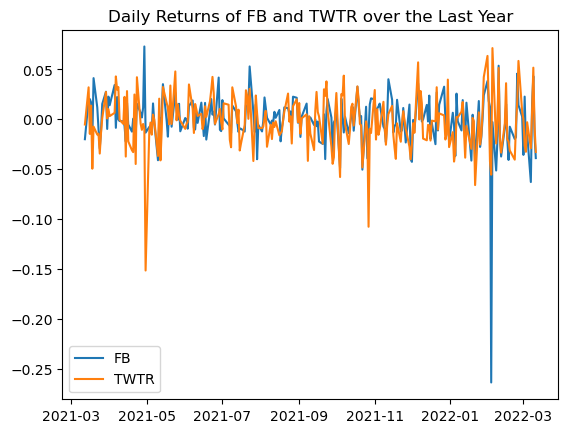

In [38]:
# Plot daily returns
df_daily_returns.plot(title="Daily Returns of FB and TWTR over the Last Year")